In [130]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from skimage import io
from os.path import expanduser
from tqdm import tqdm
HOME = expanduser("~")
import os
import cv2
import skimage.exposure

In [131]:
#DIR = os.path.join(HOME, 'programming', 'dk39')
DIR = '/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/MD585'
INPUT = os.path.join(DIR, 'preps', 'CH1', 'aligned')
OUTPUT = os.path.join(DIR, 'preps', 'CH1', 'cleaned')
files = sorted(os.listdir(INPUT))

In [222]:
# convert to hsv
def flood(img, colors):
    # convert to hsv
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

    # threshold using inRange
    if sum(colors) > 100:
        range1 = (80,80,80)
        range2 = (93,93,93)
    else:
        range1 = (0,0,0)
        range2 = (3,3,3)
        
    mask = cv2.inRange(hsv,range1,range2)
    mask = 255 - mask

    # apply morphology opening to mask
    kernel = np.ones((3,3), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_ERODE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # antialias mask
    mask = cv2.GaussianBlur(mask, (0,0), sigmaX=3, sigmaY=3, borderType = cv2.BORDER_DEFAULT)
    mask = skimage.exposure.rescale_intensity(mask, in_range=(127.5,255), out_range=(0,255))

    result = img.copy()
    result[mask==0] = colors
    return result

def place_image(img, max_width, max_height):
    zmidr = max_height // 2
    zmidc = max_width // 2
    startr = zmidr - (img.shape[0] // 2)
    endr = startr + img.shape[0]
    startc = zmidc - (img.shape[1] // 2)
    endc = startc + img.shape[1]
    new_img = np.ones([max_height, max_width]) * 240
    
    try:
        new_img[startr:endr,startc:endc] = img
    except:
        print('could not create new img', file, img.shape)
        
    return new_img.astype('uint8')

In [114]:
max_width = 1050
max_height = 1750
#max_width = 50100
#max_height = 34000
#1048x1738
#988x1624
#709x594
max_width = 1050
max_height = 800
#1038x747

In [115]:
print(max_width, max_height, len(files))

1050 800 148


In [206]:
dels = os.listdir(OUTPUT)
for d in dels:
    os.unlink(os.path.join(OUTPUT, d))

In [225]:
# get oriented for comparison
img_inputs = []
img_outputs = []
file_inputs = []
titles = []
for i, file in enumerate(tqdm(files)):
    infile = os.path.join(INPUT, file)
    src = cv2.imread(infile)
    img_inputs.append(src)
    file_inputs.append(file)    
    src = flood(src, (255,255,255))
    src = flood(src, (0,0,0))
    img_outputs.append(src)
    outpath = os.path.join(OUTPUT, file)    
    cv2.imwrite(outpath, src.astype('uint8'))
print('Finished')

100%|██████████| 75/75 [00:04<00:00, 18.43it/s]

Finished


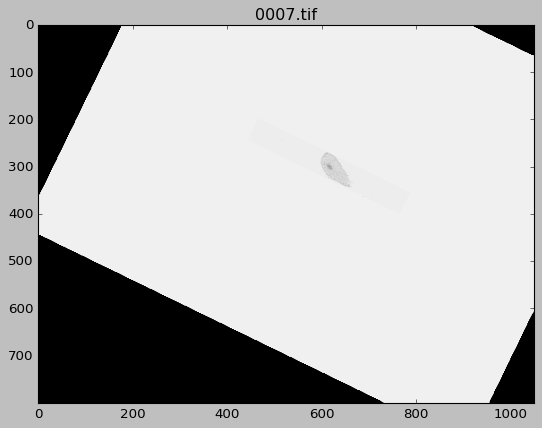

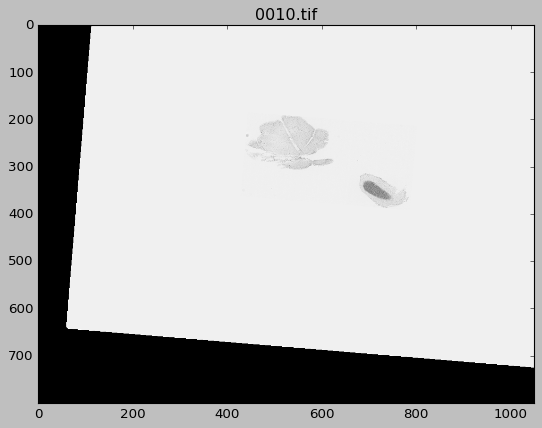

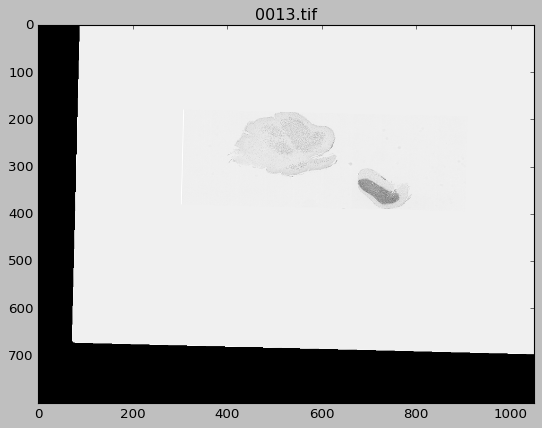

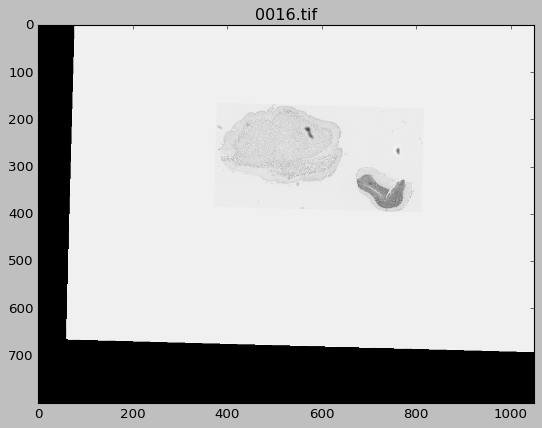

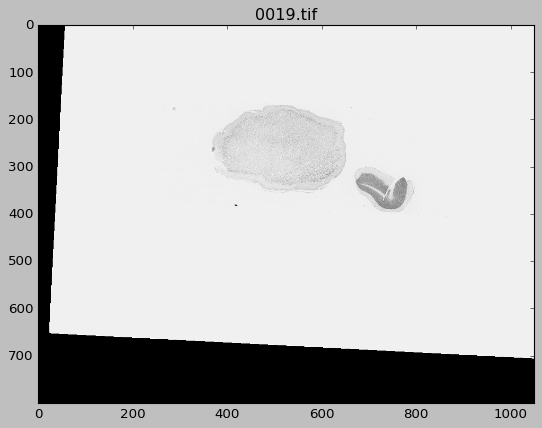

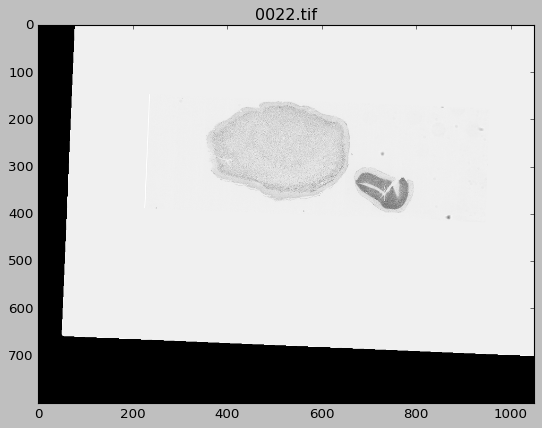

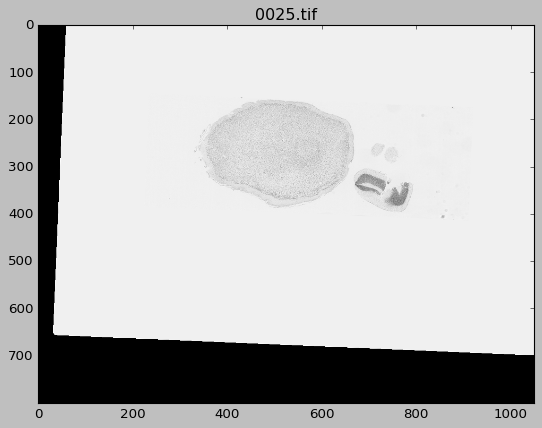

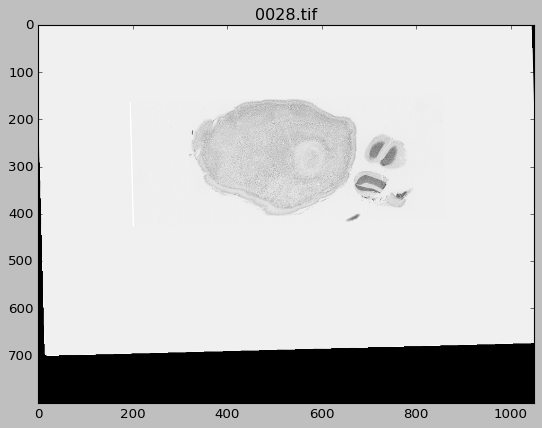

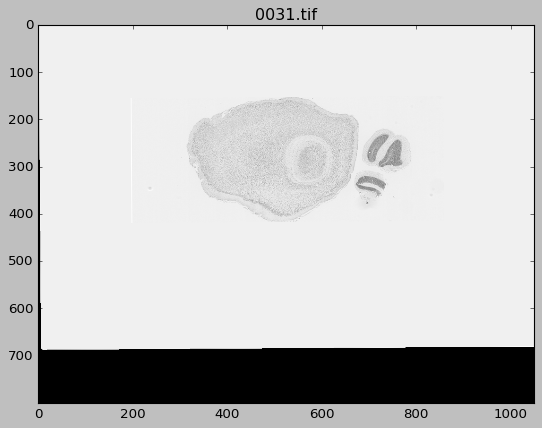

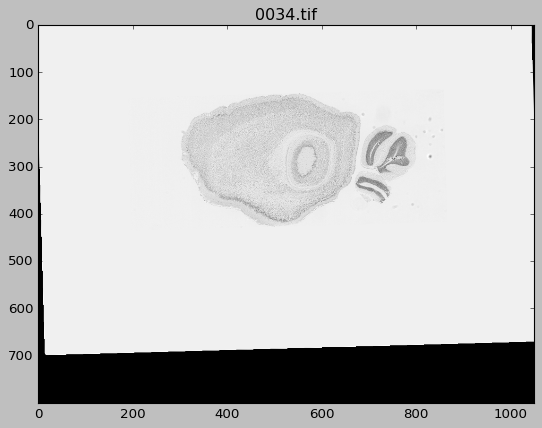

In [226]:
# display images
# check alignment
start, finish = (0,10)
#displays = masks[start:finish]
#displays = img_inputs[start:finish]
displays = img_outputs[start:finish]
#tdisplays = titles[start:finish]
names = file_inputs[start:finish]
plt.style.use('classic')
for name,img in zip(names,displays):    
    plt.figure()
    #plt.title('{} {}'.format(name, str(title)))
    plt.title('{}'.format(name))
    plt.imshow(img, cmap='gray')
    plt.show()

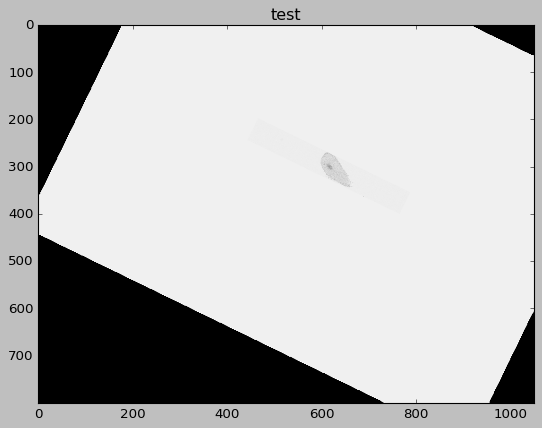

In [227]:
img = img_outputs[0]
orig = img_inputs[0]

# convert to hsv
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

# threshold using inRange
range1 = (0,0,0)
range2 = (3,3,3)
mask = cv2.inRange(hsv,range1,range2)
mask = 255 - mask

# apply morphology opening to mask
kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_ERODE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# antialias mask
mask = cv2.GaussianBlur(mask, (0,0), sigmaX=3, sigmaY=3, borderType = cv2.BORDER_DEFAULT)
mask = skimage.exposure.rescale_intensity(mask, in_range=(127.5,255), out_range=(0,255))

result = img.copy()
result[mask==0] = (255,255,255)

# threshold using inRange
range1 = (80,80,80)
range2 = (93,93,93)
mask = cv2.inRange(result,range1,range2)
mask = 255 - mask

# apply morphology opening to mask
kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_ERODE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# antialias mask
mask = cv2.GaussianBlur(mask, (0,0), sigmaX=3, sigmaY=3, borderType = cv2.BORDER_DEFAULT)
mask = skimage.exposure.rescale_intensity(mask, in_range=(127.5,255), out_range=(0,255))

result = img.copy()
result[mask==0] = (255,255,255)




plt.figure()
plt.title('test')
plt.imshow(result, cmap="gray")
plt.show()
